### Student Information
Name: 楊庭雅

Student ID: 111034562

GitHub ID: pty28766

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

---

### First

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42)
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

#### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
#Selection by callable
X.loc[::-10, lambda df: ['category_name']]

category_name
2256                 sci.med
2246  soc.religion.christian
2236           comp.graphics
2226           comp.graphics
2216             alt.atheism
...                      ...
46    soc.religion.christian
36               alt.atheism
26    soc.religion.christian
16                   sci.med
6     soc.religion.christian

[226 rows x 1 columns]

In [3]:
# Combining positional and label-based indexing
X.iloc[range(0,1000,50), X.columns.get_indexer(['text', 'category_name'])]

text           category_name
0    From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
50   From: ab@nova.cc.purdue.edu (Allen B) Subject:...           comp.graphics
100  From: mathew <mathew@mantis.co.uk> Subject: Re...             alt.atheism
150  From: lfoard@hopper.virginia.edu (Lawrence C. ...  soc.religion.christian
200  From: johnsd2@rpi.edu (Dan Johnson) Subject: R...  soc.religion.christian
250  Subject: Re: Gospel Dating From: kmr4@po.CWRU....             alt.atheism
300  Subject: Re: Yet more Rushdie [Re: ISLAMIC LAW...             alt.atheism
350  From: seanna@bnr.ca (Seanna (S.M.) Watson) Sub...  soc.religion.christian
400  From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...           comp.graphics
450  From: pharvey@quack.kfu.com (Paul Harvey) Subj...  soc.religion.christian
500  From: qpliu@phoenix.Princeton.EDU (q.p.liu) Su...             alt.atheism
550  Subject: XV for MS-DOS !!! From: NO E-MAIL ADD...           comp.graphics
600  From: "Robert Knowles" <p00261@psilink.com> Su...             alt.atheism
650  From: un034214@wvnvms.wvnet.edu Subject: M-MOT...           comp.graphics
700  From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...             alt.atheism
750  From: maridai@comm.mot.com (Marida Ignacio) Su...  soc.religion.christian
800  From: JJMARVIN@pucc.princeton.edu Subject: pra...  soc.religion.christian
850  From: phs431d@vaxc.cc.monash.edu.au Subject: R...  soc.religion.christian
900  From: pes@hutcs.cs.hut.fi (Pekka Siltanen) Sub...           comp.graphics
950  From: moy@acf2.nyu.edu (moy) Subject: Apology ...  soc.religion.christian

In [4]:
#Selecting random samples
X.sample(n=10)

text  category  \
1634  From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...         3   
178   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
815   From: kilroy@gboro.rowan.edu (Dr Nancy's Sweet...         3   
540   From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...         3   
1487  From: mcovingt@aisun3.ai.uga.edu (Michael Covi...         3   
176   From: KSTE@vm.cc.purdue.edu (Kerry Stephenson)...         3   
1693  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
1819  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   
190   From: jbrown@batman.bmd.trw.com Subject: Re: O...         0   
522   From: mcovingt@aisun3.ai.uga.edu (Michael Covi...         2   

               category_name  
1634  soc.religion.christian  
178              alt.atheism  
815   soc.religion.christian  
540   soc.religion.christian  
1487  soc.religion.christian  
176   soc.religion.christian  
1693                 sci.med  
1819  soc.religion.christian  
190              alt.atheism  
522                  sci.med

#### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?# 

In [5]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [6]:
# Answer here
# isnull 僅會判定屬於 np.nan 或是 None，如果是 string(包含空格) 則一律會認定為有值
# 先統一所有格式為string，找出可能的null字串，再一律代換成 np.nan 或是 None
NA_df['missing_example'] = NA_df['missing_example'].apply(lambda x: str(x)).replace(['nan','NaN','None',''], np.nan)
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

#### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [7]:
X_sample = X.sample(n=1000,random_state=42) #random state

__sample 過後四個 category 的比例有變化，請見下方程式__

In [8]:
# sampling 之前
s = X.category_name.value_counts().sum()
pd.DataFrame (X.category_name.value_counts()/s)

category_name
soc.religion.christian       0.265397
sci.med                      0.263181
comp.graphics                0.258751
alt.atheism                  0.212672

In [9]:
# sampling 之後
s = X_sample.category_name.value_counts().sum()
pd.DataFrame (X_sample.category_name.value_counts()/s)

category_name
sci.med                         0.277
soc.religion.christian          0.270
comp.graphics                   0.247
alt.atheism                     0.206

#### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.  

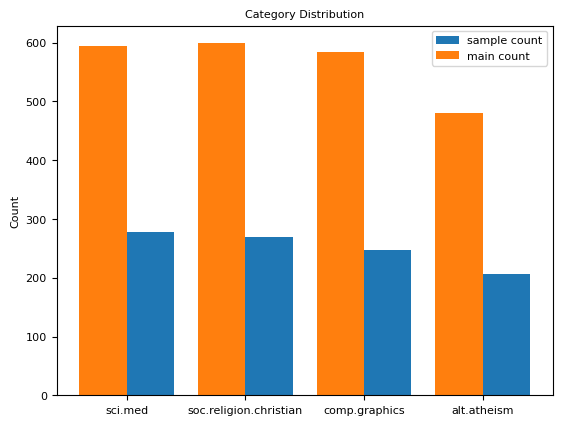

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot barchart for X_sample
df_1 = pd.DataFrame (X_sample.category_name.value_counts())
df_2 = pd.DataFrame (X.category_name.value_counts())
df_inner = df_1.merge(df_2, how="inner", left_index=True, right_index=True)
df_inner.columns = ['sample_cnt','main_cnt']

x = list(df_inner.index)
sample_y = df_inner['sample_cnt']
main_y = df_inner['main_cnt'] 
X_axis = np.arange(len(x)) 
 
plt.bar(X_axis + 0.2, sample_y, 0.4, label = 'sample count') 
plt.bar(X_axis - 0.2, main_y, 0.4, label = 'main count') 
  
plt.xticks(X_axis, x,fontsize=8) 
plt.yticks(fontsize=8) 
plt.ylabel("Count",fontsize=8) 
plt.title("Category Distribution",fontsize=8) 
plt.legend(fontsize=8) 
plt.show() 

#### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

In [12]:
# Answer here
target_list = list(X_counts[0:5, 0:100].toarray()[4])
for i in range(len(target_list)):
    if target_list[i]!=0:
        print(f'term_{count_vect.get_feature_names_out()[i]} at index {i}') #the answer is "01"

term_00 at index 0
term_01 at index 37


#### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization 

term_the  term_of  term_to  term_and  term_is  term_that  term_in  \
doc_938          5        6        6         3        2          2        0   
doc_1623         1        3        0         2        2          0        1   
doc_0            5        1        4         0        1          0        1   
doc_681          7        4        3         4        6          2        4   
doc_331         51       21       27        18        2          3       13   
...            ...      ...      ...       ...      ...        ...      ...   
doc_1089        38       23       17        17       14         14       18   
doc_1357        35       11       23         6       15         22       10   
doc_1229         4        1        1         0        1          2        1   
doc_2087         2        2        5         2        6          3        3   
doc_2070        10        5        6         4        4          4        2   

          term_it  term_you  term_not  ...  term_authority  term_knows  \
doc_938         2         4         0  ...               0           0   
doc_1623        0         0         0  ...               0           0   
doc_0           0         0         0  ...               0           0   
doc_681         5         9         1  ...               0           0   
doc_331         3         3         4  ...               0           0   
...           ...       ...       ...  ...             ...         ...   
doc_1089        8         0         5  ...               0           0   
doc_1357       13         7         3  ...               0           0   
doc_1229        2         1         0  ...               0           0   
doc_2087        5         1         2  ...               0           0   
doc_2070        6         5         0  ...               0           0   

          term_able  term_means  term_speaking  term_times  term_mary  \
doc_938           0           0              0           0          0   
doc_1623          0           0              0           0          0   
doc_0             0           0              0           0          0   
doc_681           0           0              0           0          0   
doc_331           0           0              0           1          0   
...             ...         ...            ...         ...        ...   
doc_1089          1           0              0           0          0   
doc_1357          0           0              0           0          0   
doc_1229          0           0              0           0          0   
doc_2087          1           0              0           0          0   
doc_2070          0           0              0           0          0   

          term_gif  term_bit  term_try  
doc_938          0         0         0  
doc_1623         0         0         0  
doc_0            0         0         0  
doc_681          0         0         0  
doc_331          0         0         0  
...            ...       ...       ...  
doc_1089         0         0         0  
doc_1357         0         0         0  
doc_1229         0         0         0  
doc_2087         0         0         0  
doc_2070         0         0         0  

[200 rows x 459 columns]

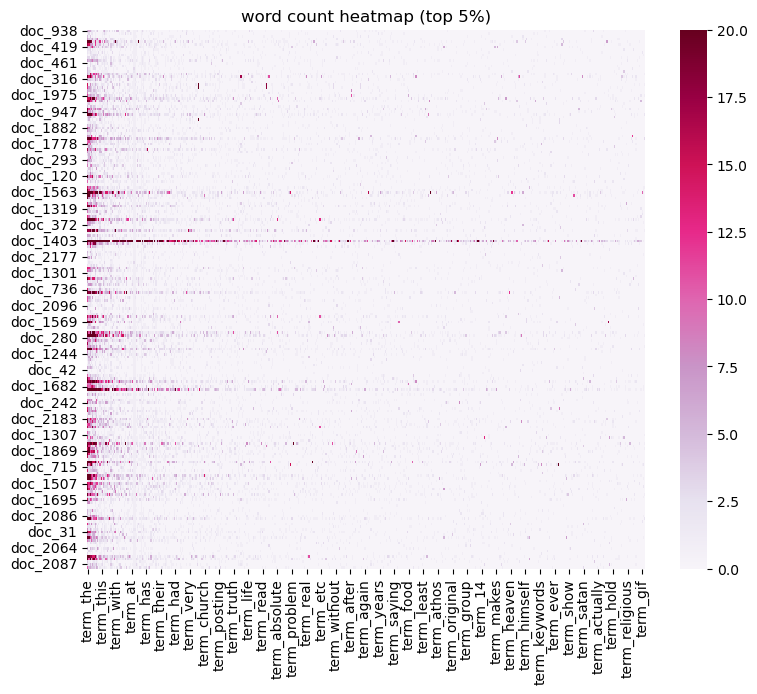

In [13]:
# Answer here
# setting weight
import seaborn as sns
X["category_cnt"] = X["category_name"].map({"soc.religion.christian":df_2['category_name']['soc.religion.christian'], 
                                               "sci.med":df_2['category_name']['sci.med'],
                                               "comp.graphics":df_2['category_name']['comp.graphics'],
                                               "alt.atheism":df_2['category_name']['alt.atheism']})
# sampling by weight
uniform_sample = X.sample(n=200, weights='category_cnt', random_state=1)

# fitting sample dataset
count_vect_sample = CountVectorizer()
X_counts_sample = count_vect_sample.fit_transform(uniform_sample.text) #learn the vocabulary and return document-term matrix

# sort word by frequency, only select the top 5% words
word_list_sample = ["term_"+str(i) for i in count_vect_sample.get_feature_names_out()]
doc_list_sample = ["doc_"+ str(i) for i in list(uniform_sample.index)]
count_list_sample = X_counts_sample.toarray() #X_counts[how many documents, how many terms]

df_all_sample = pd.DataFrame(count_list_sample, columns = word_list_sample, index = doc_list_sample)
s_sample = df_all_sample.sum()
df_rank_sample= df_all_sample[s_sample.sort_values(ascending=False).index[:int(len(word_list_sample)*0.05)]]

# display and plot
display(df_rank_sample)
plt.subplots(figsize=(9, 7))
plt.title('word count heatmap (top 5%)')
ax = sns.heatmap(df_rank_sample,
                 cmap="PuRd",
                 vmin=0, vmax=20)

#### __>>> Exercise 12 (take home):__
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.# 

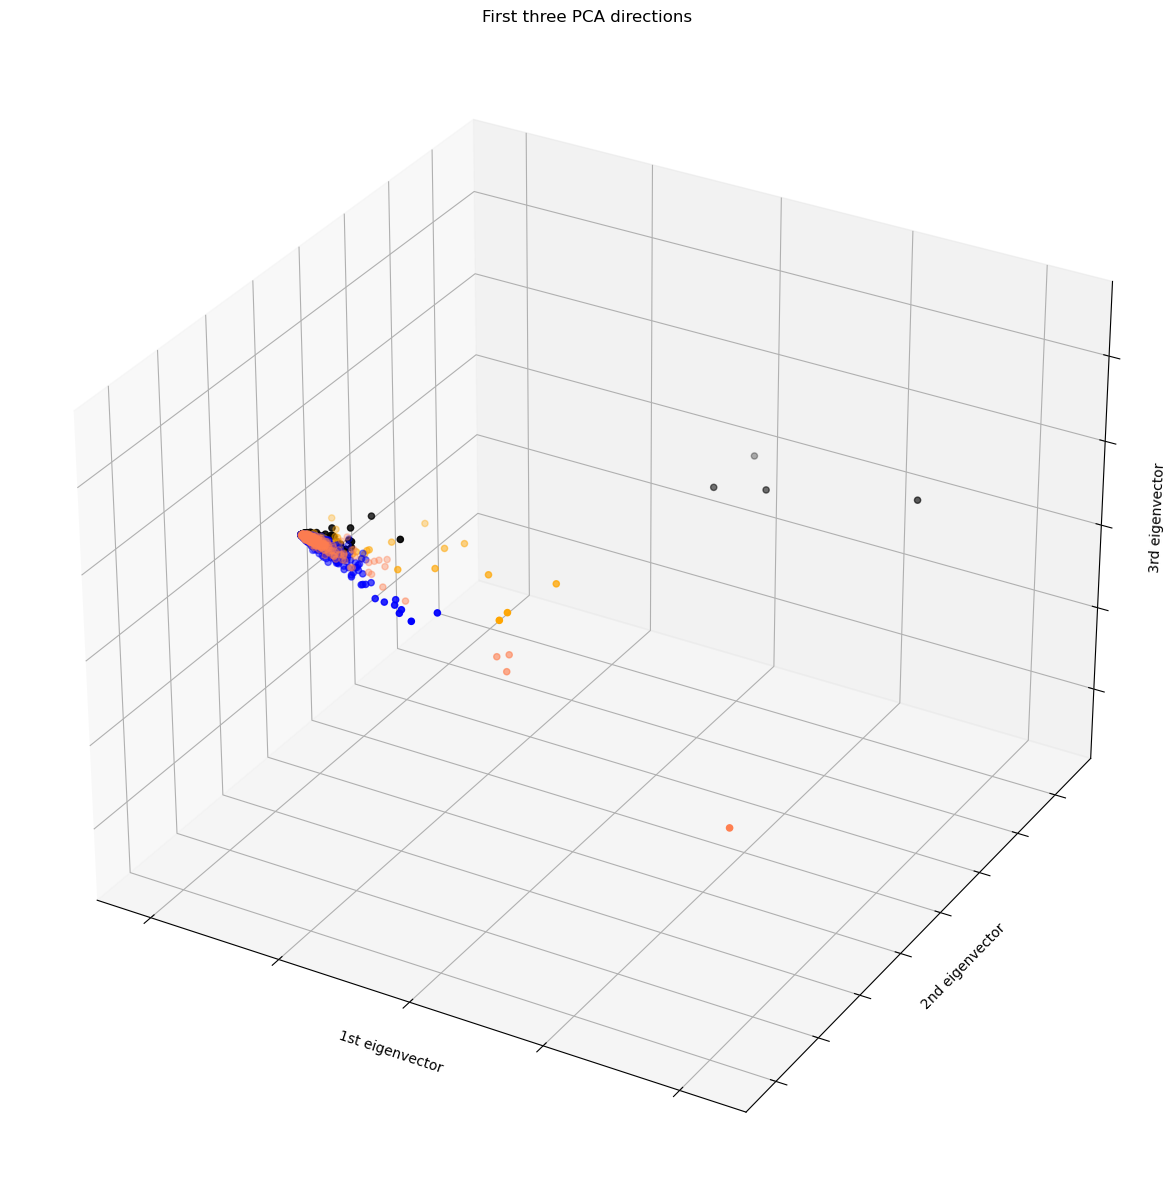

In [14]:
# Answer here
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced_3d = PCA(n_components = 3).fit_transform(X_counts.toarray())

# plot
col = ['coral', 'blue', 'black', 'orange']
fig_3d = plt.figure(figsize = (15,15))
ax_3d = Axes3D(fig_3d)
ax_3d = fig_3d.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs_3d = X_reduced_3d[X['category_name'] == category].T[0]
    ys_3d = X_reduced_3d[X['category_name'] == category].T[1]
   
    ax_3d.scatter(xs_3d, ys_3d, c = c, marker='o')

ax_3d.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax_3d.set_title("First three PCA directions")
ax_3d.set_xlabel("1st eigenvector")
ax_3d.xaxis.set_ticklabels([])
ax_3d.set_ylabel("2nd eigenvector")
ax_3d.yaxis.set_ticklabels([])
ax_3d.set_zlabel("3rd eigenvector")
ax_3d.zaxis.set_ticklabels([])

plt.show()

#### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [15]:
# Answer here
import plotly.express as px

X_reduced_3d_df = pd.DataFrame (X_reduced_3d, columns =['1st eigenvector','2nd eigenvector','3rd eigenvector'])
X_reduced_3d_df['category_name']=X['category_name']

fig = px.scatter_3d(
    X_reduced_3d_df,
    x="1st eigenvector",
    y="2nd eigenvector",
    z="3rd eigenvector",
    color="category_name",
    hover_name="category_name"
)
fig.show()

#### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.  

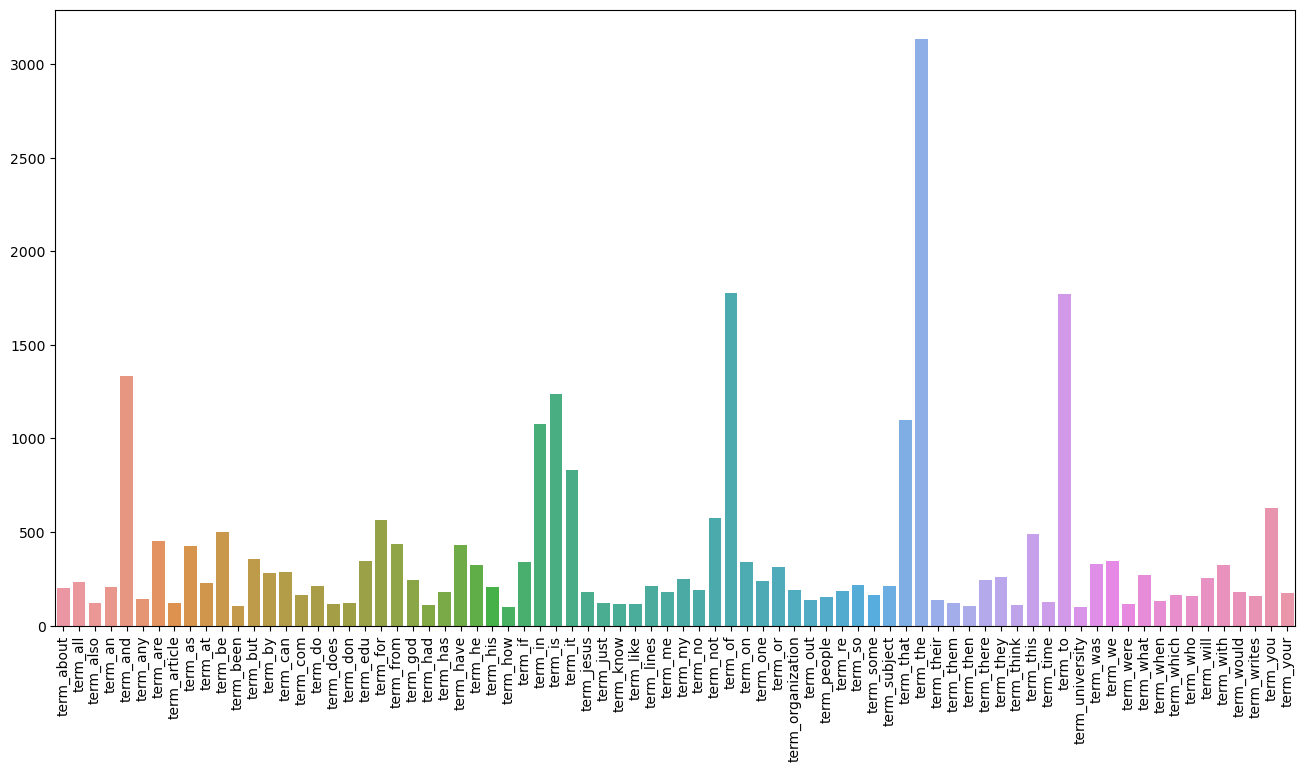

In [16]:
# filter the terms with frequency>=100
freq_bigger_then_100 = df_all_sample[s_sample[s_sample>=100].index]
term_frequencies_bigger_then_100 = np.asarray(freq_bigger_then_100.sum(axis=0))
plt.subplots(figsize=(16, 8))
g = sns.barplot(x=list(freq_bigger_then_100.columns),  
            y=term_frequencies_bigger_then_100)
g.set_xticklabels(list(freq_bigger_then_100.columns), rotation = 90);

#### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

term_the  term_of  term_to  term_and  term_is  term_in  term_that  \
doc_0            5        1        4         0        1        1          0   
doc_1           11        8        4         0       10        2          0   
doc_2           14       10       26         9        4        6          8   
doc_3            6        2        0         1        1        3          0   
doc_4           10        3        8         3        2        3          1   
...            ...      ...      ...       ...      ...      ...        ...   
doc_2252         0        4        0         1        0        0          0   
doc_2253        63       40       32        48       17       22          5   
doc_2254        26       17       13        12       14        3         11   
doc_2255       123       68       64        59       23       24          8   
doc_2256         6        2        0         0        2        1          0   

          term_it  term_you  term_for  ...  term_evidence  term_years  \
doc_0           0         0         0  ...              0           0   
doc_1           2         0         2  ...              0           0   
doc_2           8        13         6  ...              0           2   
doc_3           0         0         1  ...              0           0   
doc_4           1         1         2  ...              0           0   
...           ...       ...       ...  ...            ...         ...   
doc_2252        0         1         2  ...              0           0   
doc_2253        9         5        14  ...              0           1   
doc_2254        5         3         3  ...              0           1   
doc_2255       14        50        32  ...              0           0   
doc_2256        0         2         1  ...              1           0   

          term_might  term_uk  term_however  term_before  term_day  term_own  \
doc_0              0        2             0            0         0         0   
doc_1              0        0             0            0         0         0   
doc_2              0        0             0            0         1         0   
doc_3              0        0             0            0         0         0   
doc_4              0        0             0            0         0         0   
...              ...      ...           ...          ...       ...       ...   
doc_2252           0        0             0            0         0         0   
doc_2253           0        0             2            2         0         0   
doc_2254           0        0             0            0         0         0   
doc_2255           0        1             1            1         1         1   
doc_2256           0        0             0            0         0         0   

          term_never  term_go  
doc_0              0        0  
doc_1              0        0  
doc_2              0        1  
doc_3              0        0  
doc_4              0        1  
...              ...      ...  
doc_2252           0        0  
doc_2253           0        0  
doc_2254           0        1  
doc_2255           2        4  
doc_2256           0        0  

[2257 rows x 178 columns]

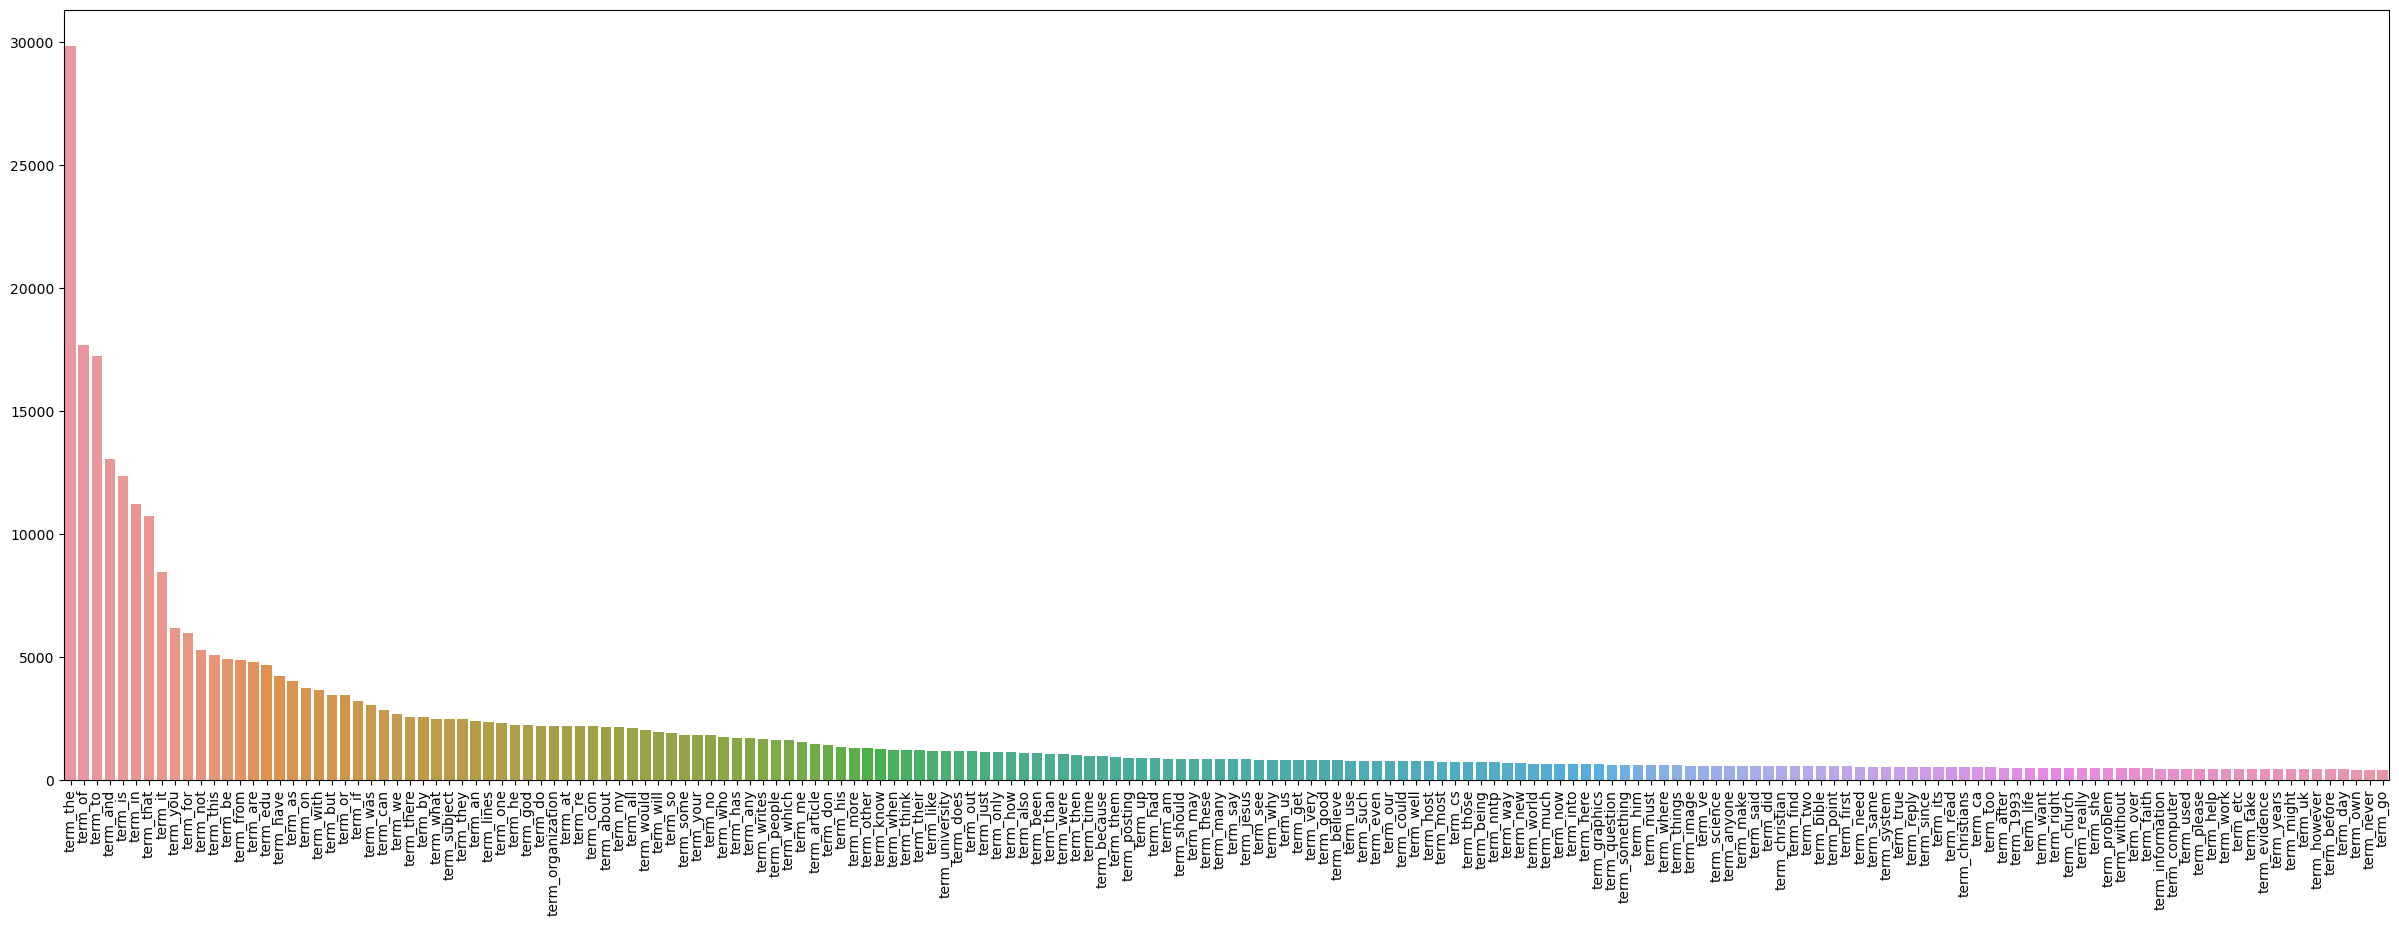

In [17]:
# fitting dataset
# sort word by frequency, only select the top 5% words
word_list = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
doc_list = ["doc_"+ str(i) for i in list(X.index)]
count_list = X_counts.toarray() #X_counts[how many documents, how many terms]

df_all = pd.DataFrame(count_list, columns = word_list, index = doc_list)
s = df_all.sum()
df_rank = df_all[s.sort_values(ascending=False).index[:int(len(word_list)*0.005)]]

term_frequencies_rank = list(df_rank.sum(axis=0))

# display and plot
display(df_rank)
plt.subplots(figsize=(30, 10))
g_rank = sns.barplot(x=list(df_rank.columns), y=term_frequencies_rank)
g_rank.set_xticklabels(list(df_rank.columns), rotation = 90);

#### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [18]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb_name = preprocessing.LabelBinarizer()
mlb_name.fit(X.category_name)
X['bin_category_name'] = mlb_name.transform(X['category_name']).tolist()
X[0:20] #works

text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2   From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3   From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4   From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5   From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6   From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7   From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8   From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9   From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
12  From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
13  Subject: So what is Maddi? From: madhaus@netco...         0   
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
16  From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
17  Organization: Penn State University From: <JSN...         0   
18  From: tom_milligan@rainbow.mentorg.com Subject...         3   
19  Subject: Re: Don't more innocents die without ...         0   

             category_name  category_cnt bin_category_name  
0            comp.graphics           584      [0, 1, 0, 0]  
1            comp.graphics           584      [0, 1, 0, 0]  
2   soc.religion.christian           599      [0, 0, 0, 1]  
3   soc.religion.christian           599      [0, 0, 0, 1]  
4   soc.religion.christian           599      [0, 0, 0, 1]  
5   soc.religion.christian           599      [0, 0, 0, 1]  
6   soc.religion.christian           599      [0, 0, 0, 1]  
7                  sci.med           594      [0, 0, 1, 0]  
8                  sci.med           594      [0, 0, 1, 0]  
9                  sci.med           594      [0, 0, 1, 0]  
10  soc.religion.christian           599      [0, 0, 0, 1]  
11           comp.graphics           584      [0, 1, 0, 0]  
12             alt.atheism           480      [1, 0, 0, 0]  
13             alt.atheism           480      [1, 0, 0, 0]  
14           comp.graphics           584      [0, 1, 0, 0]  
15           comp.graphics           584      [0, 1, 0, 0]  
16                 sci.med           594      [0, 0, 1, 0]  
17             alt.atheism           480      [1, 0, 0, 0]  
18  soc.religion.christian           599      [0, 0, 0, 1]  
19             alt.atheism           480      [1, 0, 0, 0]

### Second

In [19]:
import warnings
warnings.filterwarnings("ignore")

#### Data Preparation & Data Transformation

In [20]:
websites = ['imdb','amazon','yelp']

data = pd.DataFrame()

path_imdb = "imdb_labelled.txt"
with open(path_imdb,encoding="utf-8") as f:
    for line in f.readlines():
        s = line.split('\t')
        data = data.append({"sentence":s[0],"score":int(s[1][0]),"website":'imdb.com'},ignore_index=True)

path_amazon = "amazon_cells_labelled.txt"
with open(path_amazon,encoding="utf-8") as f:
    for line in f.readlines():
        s = line.split('\t')
        data = data.append({"sentence":s[0],"score":int(s[1][0]),"website":'amazon.com'},ignore_index=True)

path_yelp = "yelp_labelled.txt"
with open(path_yelp,encoding="utf-8") as f:
    for line in f.readlines():
        s = line.split('\t')
        data = data.append({"sentence":s[0],"score":int(s[1][0]),"website":'yelp.com'},ignore_index=True)
        
data   

sentence  score   website
0     A very, very, very slow-moving, aimless movie ...      0  imdb.com
1     Not sure who was more lost - the flat characte...      0  imdb.com
2     Attempting artiness with black & white and cle...      0  imdb.com
3          Very little music or anything to speak of.        0  imdb.com
4     The best scene in the movie was when Gerardo i...      1  imdb.com
...                                                 ...    ...       ...
2995  I think food should have flavor and texture an...      0  yelp.com
2996                           Appetite instantly gone.      0  yelp.com
2997  Overall I was not impressed and would not go b...      0  yelp.com
2998  The whole experience was underwhelming, and I ...      0  yelp.com
2999  Then, as if I hadn't wasted enough of my life ...      0  yelp.com

[3000 rows x 3 columns]

#### Missing Value & Duplicate Data

In [21]:
# check missing values
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                              website  
0  The amoung of missing records is:   
1                                   0

In [22]:
# Dealing with Duplicate Data
sum(data.duplicated())

17

In [23]:
# Dealing with Duplicate Data
print('duplicate sentences : \n')
for i in range(len(list(data.duplicated('sentence')))):
    if list(data.duplicated('sentence'))[i]!=False: 
        print(data['sentence'][i],data['score'][i],data['website'][i],i)

duplicate sentences : 

Definitely worth checking out.   1 imdb.com 363
Not recommended.   0 imdb.com 585
10/10   1 imdb.com 788
Great phone!. 1 amazon.com 1285
Works great. 1 amazon.com 1407
Works great!. 1 amazon.com 1524
Don't buy this product. 0 amazon.com 1543
If you like a loud buzzing to override all your conversations, then this phone is for you! 0 amazon.com 1744
Does not fit. 0 amazon.com 1748
This is a great deal. 1 amazon.com 1778
Great Phone. 1 amazon.com 1792
Excellent product for the price. 1 amazon.com 1892
Great phone. 1 amazon.com 1896
I love this place. 1 yelp.com 2814
The food was terrible. 0 yelp.com 2816
I won't be back. 0 yelp.com 2843
I would not recommend this place. 0 yelp.com 2846


In [24]:
# Dealing with Duplicate Data
data.drop_duplicates(keep='first', inplace=True) # inplace applies changes directly on our dataframe
print(len(data),sum(data.duplicated()))

2983 0


#### Data Distribution

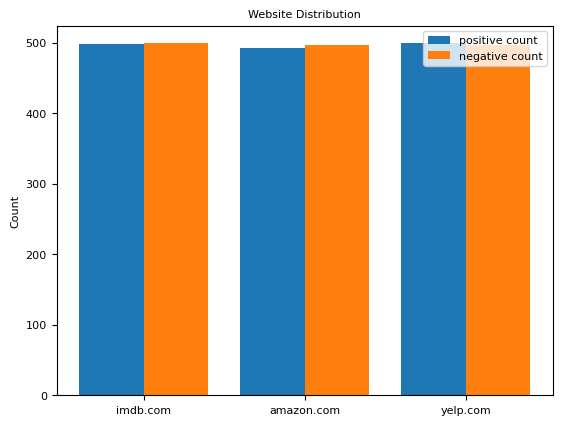

In [25]:
# plot barchart for the count of negative and positive score in each website

df_1 = pd.DataFrame (data[data['website']=='imdb.com'].score.value_counts())
df_2 = pd.DataFrame (data[data['website']=='amazon.com'].score.value_counts())
df_3 = pd.DataFrame (data[data['website']=='yelp.com'].score.value_counts())

df_inner = df_1.merge(df_2, how="inner", left_index=True, right_index=True)
df_inner = df_inner.merge(df_3, how="inner", left_index=True, right_index=True)
df_inner.columns = ['imdb.com','amazon.com','yelp.com']
df_inner = df_inner.T

x = list(df_inner.index)
positive_count = df_inner[1]
negative_count = df_inner[0] 
X_axis = np.arange(len(x)) 
 
plt.bar(X_axis - 0.2, positive_count, 0.4, label = 'positive count') 
plt.bar(X_axis + 0.2, negative_count, 0.4, label = 'negative count') 
  
plt.xticks(X_axis, x,fontsize=8) 
plt.yticks(fontsize=8) 
plt.ylabel("Count",fontsize=8) 
plt.title("Website Distribution",fontsize=8) 
plt.legend(fontsize=8) 
plt.show() 

#### Feature Creation & subset selection

In [26]:
import nltk
nltk.download('punkt')
# takes a like a minute or two to process
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))
data['unigrams']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\725\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       [A, very, ,, very, ,, very, slow-moving, ,, ai...
1       [Not, sure, who, was, more, lost, -, the, flat...
2       [Attempting, artiness, with, black, &, white, ...
3       [Very, little, music, or, anything, to, speak,...
4       [The, best, scene, in, the, movie, was, when, ...
                              ...                        
2995    [I, think, food, should, have, flavor, and, te...
2996                       [Appetite, instantly, gone, .]
2997    [Overall, I, was, not, impressed, and, would, ...
2998    [The, whole, experience, was, underwhelming, ,...
2999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: unigrams, Length: 2983, dtype: object

In [27]:
count_vect_data = CountVectorizer()
data_counts = count_vect_data.fit_transform(data.sentence) #learn the vocabulary and return document-term matrix
print(data_counts.shape)
print(data_counts[0])
print(count_vect_data.get_feature_names_out()[4890])

(2983, 5155)
  (0, 4890)	3
  (0, 4133)	1
  (0, 2956)	1
  (0, 166)	1
  (0, 2954)	1
  (0, 75)	1
  (0, 1331)	1
  (0, 1401)	1
  (0, 5139)	1
  (0, 2764)	1
very


In [28]:
analyze_data = count_vect_data.build_analyzer()
analyze_data(data.sentence[0])

['very',
 'very',
 'very',
 'slow',
 'moving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [29]:
# setting weight
import seaborn as sns
data["website_cnt"] = data["website"].map({"imdb.com":df_1.sum(), 
                                               "amazon.com":df_2.sum(),
                                               "yelp.com":df_3.sum()})

# sampling by weight
sample_data = data.sample(n=400, weights="website_cnt", random_state=12)
sample_data_positive = sample_data[sample_data["score"]==1]
sample_data_negative = sample_data[sample_data["score"]==0]

__接下來的分析是使用 400 筆 sample (根據 website 權重)，主要是想降低 visualization 的複雜度，取其中的 positive 跟 negative sample 分別進行 heat map (針對前 10% tf) & bar chart 分析 (針對前 5% tf) 的分析__

(192, 896)
  (0, 471)	1
  (0, 415)	2
  (0, 849)	1
  (0, 633)	1
  (0, 668)	1


term_the  term_and  term_is  term_of  term_it  term_this  term_was  \
doc_785          0         0        0        0        2          0         1   
doc_1599         1         0        1        0        1          0         0   
doc_99           1         1        0        1        0          1         0   
doc_409          1         0        0        0        0          0         0   
doc_1819         0         0        0        0        1          0         0   
...            ...       ...      ...      ...      ...        ...       ...   
doc_2438         0         0        0        0        0          0         0   
doc_749          1         0        0        1        0          0         1   
doc_1937         1         0        0        0        0          0         0   
doc_496          0         1        1        0        0          1         0   
doc_755          0         0        0        1        0          0         0   

          term_great  term_to  term_with  ...  term_if  term_every  \
doc_785            0        0          0  ...        0           0   
doc_1599           0        0          0  ...        0           0   
doc_99             0        0          1  ...        1           0   
doc_409            0        0          1  ...        0           0   
doc_1819           0        0          0  ...        0           0   
...              ...      ...        ...  ...      ...         ...   
doc_2438           0        0          0  ...        0           0   
doc_749            0        0          0  ...        0           0   
doc_1937           0        0          1  ...        0           0   
doc_496            0        0          0  ...        0           0   
doc_755            0        0          0  ...        0           0   

          term_which  term_we  term_they  term_could  term_them  term_back  \
doc_785            0        0          0           0          0          0   
doc_1599           1        0          0           0          0          0   
doc_99             0        0          0           0          0          0   
doc_409            0        0          0           0          0          0   
doc_1819           0        0          0           0          0          0   
...              ...      ...        ...         ...        ...        ...   
doc_2438           0        0          0           0          0          0   
doc_749            0        0          0           0          0          0   
doc_1937           0        0          0           0          0          0   
doc_496            0        0          0           0          0          0   
doc_755            0        0          0           0          0          0   

          term_see  term_perfect  
doc_785          0             0  
doc_1599         0             0  
doc_99           0             0  
doc_409          0             0  
doc_1819         0             0  
...            ...           ...  
doc_2438         0             0  
doc_749          0             0  
doc_1937         0             0  
doc_496          0             0  
doc_755          0             0  

[192 rows x 89 columns]

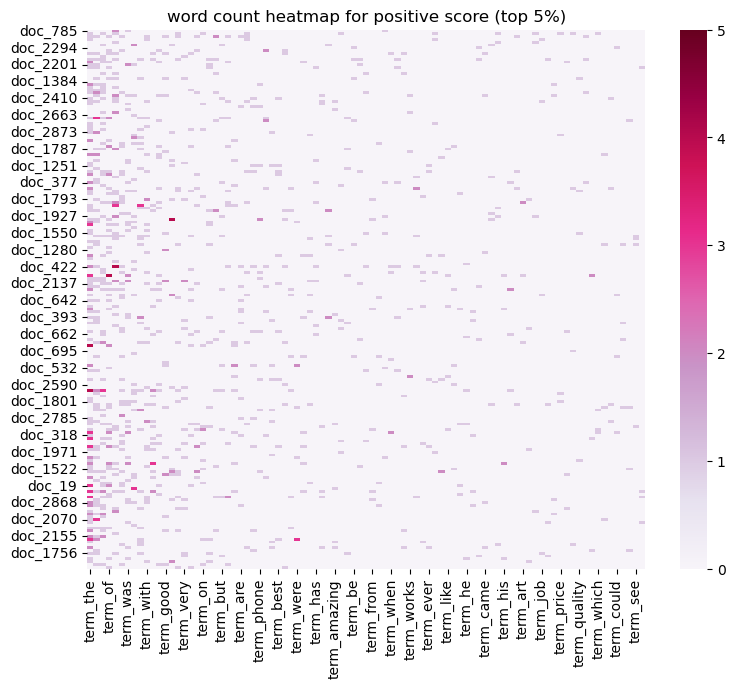

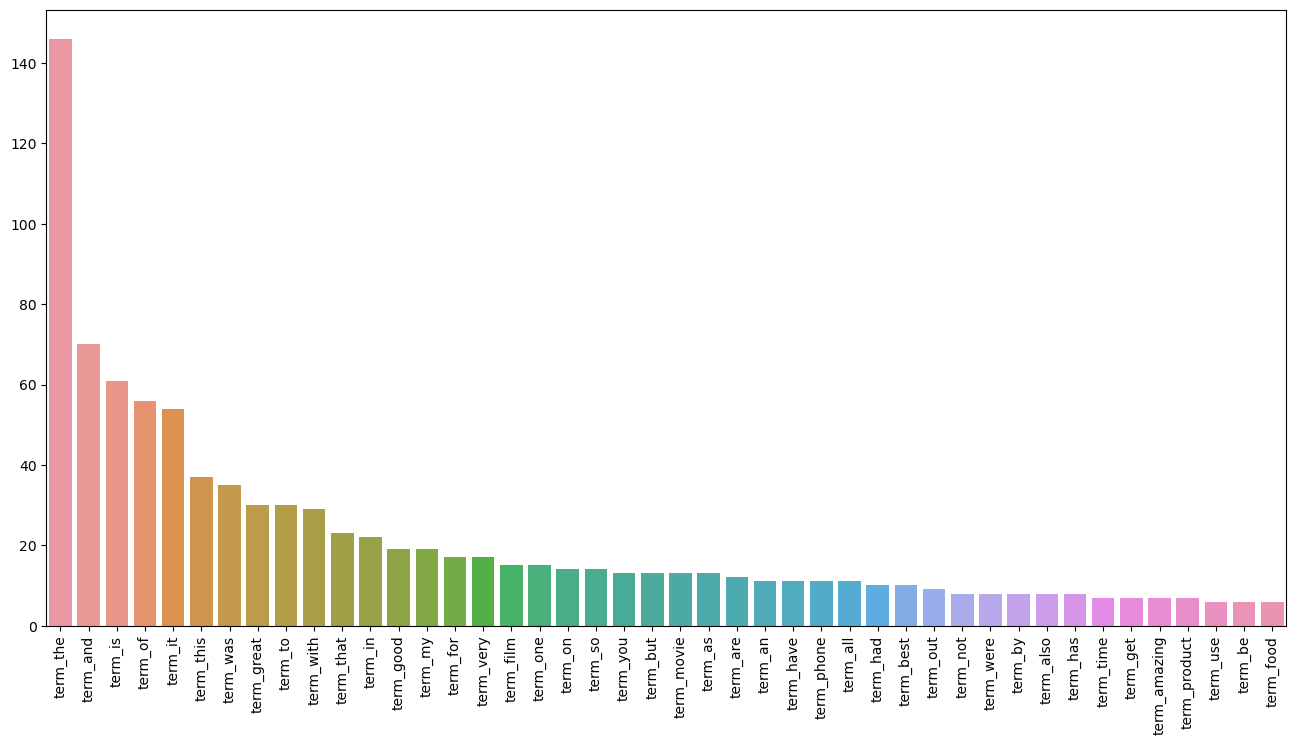

In [30]:
# fitting positive sample dataset
count_vect_sample_data = CountVectorizer()
data_counts_sample_data = count_vect_sample_data.fit_transform(sample_data_positive.sentence) #learn the vocabulary and return document-term matrix
print(data_counts_sample_data.shape)
print(data_counts_sample_data[0])

# sort word by frequency, only select the top 5% words
term_list_sample = ["term_"+str(i) for i in count_vect_sample_data.get_feature_names_out()]
sentence_list_sample = ["doc_"+ str(i) for i in list(sample_data_positive.index)]

data_count_list_sample = data_counts_sample_data.toarray() #X_counts[how many documents, how many terms]

df_sample_data = pd.DataFrame(data_count_list_sample, columns = term_list_sample, index = sentence_list_sample)
s_sample_data = df_sample_data.sum()
df_rank_sample_data = df_sample_data[s_sample_data.sort_values(ascending=False).index[:int(len(term_list_sample)*0.1)]]

# display and plot
display(df_rank_sample_data)
plt.subplots(figsize=(9, 7))
plt.title('word count heatmap for positive score (top 5%)')
ax = sns.heatmap(df_rank_sample_data,
                 cmap="PuRd",
                 vmin=0, vmax=5)

# filter the terms with frequency>=10
freq_bigger_then_100 = df_sample_data[s_sample_data.sort_values(ascending=False).index[:int(len(term_list_sample)*0.05)]]
term_frequencies_bigger_then_100 = np.asarray(freq_bigger_then_100.sum(axis=0))
plt.subplots(figsize=(16, 8))
g = sns.barplot(x=list(freq_bigger_then_100.columns),  
            y=term_frequencies_bigger_then_100)
g.set_xticklabels(list(freq_bigger_then_100.columns), rotation = 90);

(208, 930)
  (0, 814)	1
  (0, 422)	1
  (0, 558)	1
  (0, 220)	1
  (0, 542)	1
  (0, 370)	1
  (0, 125)	1
  (0, 884)	1
  (0, 424)	1
  (0, 648)	1
  (0, 556)	1
  (0, 329)	1
  (0, 515)	1
  (0, 147)	1
  (0, 36)	1
  (0, 877)	1
  (0, 867)	1
  (0, 231)	1


term_the  term_and  term_it  term_was  term_is  term_this  term_not  \
doc_459          0         1        1         1        1          1         1   
doc_2221         1         0        0         1        0          0         0   
doc_43           0         0        1         0        0          0         1   
doc_2754         1         1        0         0        2          0         0   
doc_2700         1         1        0         0        0          0         1   
...            ...       ...      ...       ...      ...        ...       ...   
doc_2033         0         1        0         0        0          0         0   
doc_1677         0         0        0         0        0          0         0   
doc_2565         0         1        0         0        0          2         0   
doc_373          1         0        2         2        0          0         0   
doc_164          1         0        1         1        0          1         0   

          term_of  term_that  term_to  ...  term_work  term_place  term_money  \
doc_459         0          0        0  ...          0           0           0   
doc_2221        0          0        0  ...          0           0           0   
doc_43          0          0        0  ...          0           0           0   
doc_2754        1          1        0  ...          0           0           0   
doc_2700        0          1        0  ...          0           0           0   
...           ...        ...      ...  ...        ...         ...         ...   
doc_2033        1          0        1  ...          0           1           0   
doc_1677        0          0        0  ...          0           0           0   
doc_2565        0          0        2  ...          0           2           0   
doc_373         0          0        1  ...          0           0           0   
doc_164         0          1        1  ...          0           0           0   

          term_talk  term_make  term_sound  term_up  term_disappointed  \
doc_459           0          0           0        0                  1   
doc_2221          0          0           0        0                  0   
doc_43            0          0           0        0                  0   
doc_2754          0          0           0        1                  0   
doc_2700          0          0           0        0                  0   
...             ...        ...         ...      ...                ...   
doc_2033          0          0           0        0                  0   
doc_1677          0          0           0        0                  0   
doc_2565          0          0           0        0                  0   
doc_373           0          0           0        0                  0   
doc_164           0          0           0        0                  0   

          term_simply  term_an  
doc_459             0        0  
doc_2221            0        0  
doc_43              0        0  
doc_2754            0        0  
doc_2700            0        0  
...               ...      ...  
doc_2033            0        0  
doc_1677            0        0  
doc_2565            0        0  
doc_373             0        0  
doc_164             0        0  

[208 rows x 93 columns]

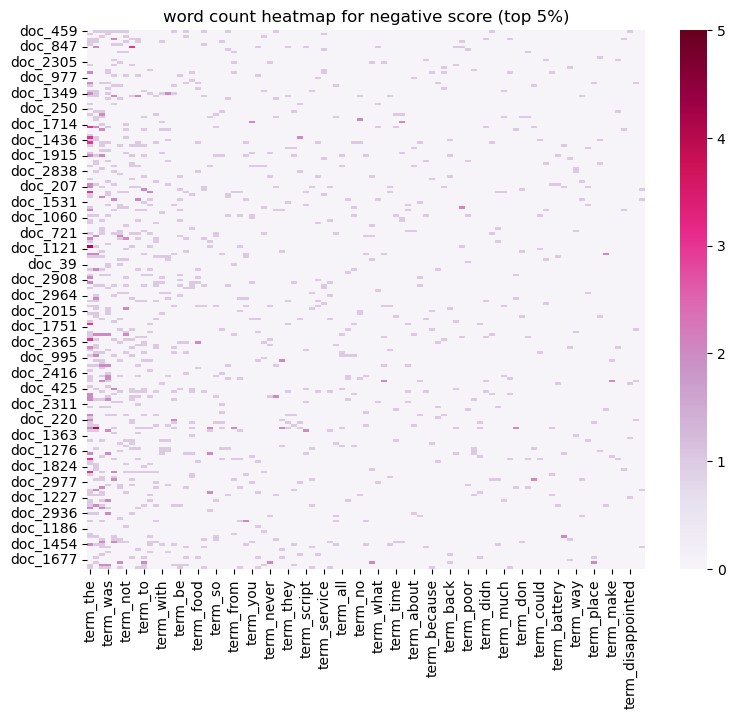

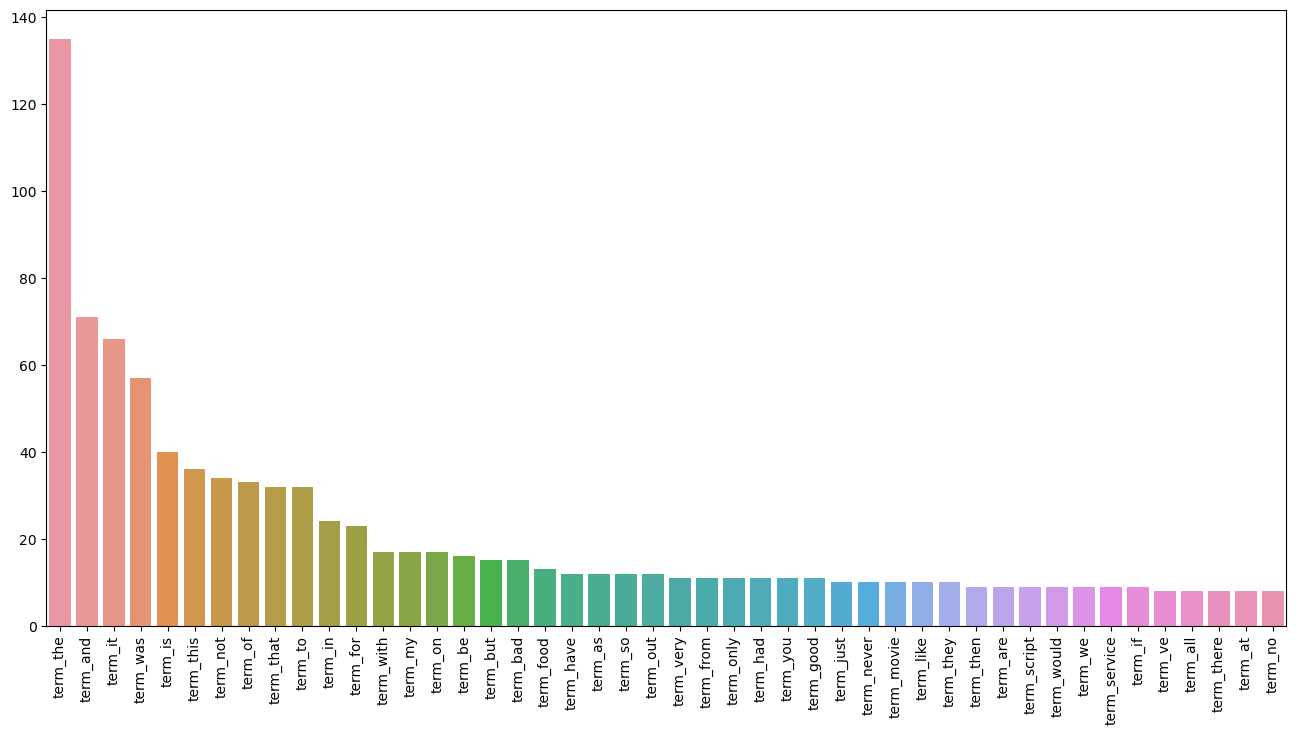

In [31]:
# fitting negative sample dataset
count_vect_sample_data = CountVectorizer()
data_counts_sample_data = count_vect_sample_data.fit_transform(sample_data_negative.sentence) #learn the vocabulary and return document-term matrix
print(data_counts_sample_data.shape)
print(data_counts_sample_data[0])

# sort word by frequency, only select the top 5% words
term_list_sample = ["term_"+str(i) for i in count_vect_sample_data.get_feature_names_out()]
sentence_list_sample = ["doc_"+ str(i) for i in list(sample_data_negative.index)]
data_count_list_sample = data_counts_sample_data.toarray() #X_counts[how many documents, how many terms]

df_sample_data = pd.DataFrame(data_count_list_sample, columns = term_list_sample, index = sentence_list_sample)
s_sample_data = df_sample_data.sum()
df_rank_sample_data = df_sample_data[s_sample_data.sort_values(ascending=False).index[:int(len(term_list_sample)*0.1)]]

# display and plot
display(df_rank_sample_data)
plt.subplots(figsize=(9, 7))
plt.title('word count heatmap for negative score (top 5%)')
ax = sns.heatmap(df_rank_sample_data,
                 cmap="PuRd",
                 vmin=0, vmax=5)

# filter the terms with frequency>=10
freq_bigger_then_100 = df_sample_data[s_sample_data.sort_values(ascending=False).index[:int(len(term_list_sample)*0.05)]]
term_frequencies_bigger_then_100 = np.asarray(freq_bigger_then_100.sum(axis=0))
plt.subplots(figsize=(16, 8))
g = sns.barplot(x=list(freq_bigger_then_100.columns),  
            y=term_frequencies_bigger_then_100)
g.set_xticklabels(list(freq_bigger_then_100.columns), rotation = 90);

#### Dimensionality Reduction & Attribute Transformation / Aggregation

In [32]:
# Answer here
data_reduced_3d = PCA(n_components = 3).fit_transform(data_counts.toarray())
data_reduced_3d_df = pd.DataFrame (data_reduced_3d, columns = ['1st eigenvector','2nd eigenvector','3rd eigenvector'])
data_reduced_3d_df['score'] = data['score']

fig = px.scatter_3d(
    data_reduced_3d_df,
    x="1st eigenvector",
    y="2nd eigenvector",
    z="3rd eigenvector",
    color="score",
    hover_name="score"
)
fig.show()

<img src='plotly.png' width="4000" height="4000">

#### Discretization and Binarization

In [33]:
# website binarization
mlb_name_data = preprocessing.LabelBinarizer()
mlb_name_data.fit(data.website)
data['bin_website'] = mlb_name_data.transform(data['website']).tolist()
data[::100] 

sentence  score     website  \
0     A very, very, very slow-moving, aimless movie ...      0    imdb.com   
100           I don't think you will be disappointed.        1    imdb.com   
200           This is definitely one of the bad ones.        0    imdb.com   
300   I recommend this for EVERYONE who loves film, ...      1    imdb.com   
401   For people who are first timers in film making...      1    imdb.com   
501   I left the theater with a lilt in my step, joy...      1    imdb.com   
602   I saw this movie and I thought this is a stupi...      0    imdb.com   
702   But she is still a bad actress, repeating her ...      0    imdb.com   
803   The acting from all involved and that includes...      0    imdb.com   
903   There is, however, some pretty good acting (at...      1    imdb.com   
1003  Tied to charger for conversations lasting more...      0  amazon.com   
1103  The price was very good and with the free ship...      1  amazon.com   
1203  The best electronics of the available FM Trans...      1  amazon.com   
1304  Everything worked on the first try.The device ...      1  amazon.com   
1404                   don't waste your money and time.      0  amazon.com   
1505  The sound quality for the device is unacceptab...      0  amazon.com   
1607                   Sprint charges for this service.      0  amazon.com   
1707  This is cool because most cases are just open ...      1  amazon.com   
1811                #1 It Works - #2 It is Comfortable.      1  amazon.com   
1913                             Couldn't figure it out      0  amazon.com   
2013  I tried the Cape Cod ravoli, chicken,with cran...      1    yelp.com   
2113                            Nice, spicy and tender.      1    yelp.com   
2213                                     Won't go back.      0    yelp.com   
2313                                  Never going back.      0    yelp.com   
2413   I can assure you that you won't be disappointed.      1    yelp.com   
2513                            Reasonably priced also!      1    yelp.com   
2613  Sorry, I will not be getting food from here an...      0    yelp.com   
2713     If you are reading this please don't go there.      0    yelp.com   
2813                                    It was packed!!      0    yelp.com   
2917           I got food poisoning here at the buffet.      0    yelp.com   

                                               unigrams  \
0     [A, very, ,, very, ,, very, slow-moving, ,, ai...   
100   [I, do, n't, think, you, will, be, disappointe...   
200   [This, is, definitely, one, of, the, bad, ones...   
300   [I, recommend, this, for, EVERYONE, who, loves...   
401   [For, people, who, are, first, timers, in, fil...   
501   [I, left, the, theater, with, a, lilt, in, my,...   
602   [I, saw, this, movie, and, I, thought, this, i...   
702   [But, she, is, still, a, bad, actress, ,, repe...   
803   [The, acting, from, all, involved, and, that, ...   
903   [There, is, ,, however, ,, some, pretty, good,...   
1003  [Tied, to, charger, for, conversations, lastin...   
1103  [The, price, was, very, good, and, with, the, ...   
1203  [The, best, electronics, of, the, available, F...   
1304  [Everything, worked, on, the, first, try.The, ...   
1404        [do, n't, waste, your, money, and, time, .]   
1505  [The, sound, quality, for, the, device, is, un...   
1607           [Sprint, charges, for, this, service, .]   
1707  [This, is, cool, because, most, cases, are, ju...   
1811  [#, 1, It, Works, -, #, 2, It, is, Comfortable...   
1913                      [Could, n't, figure, it, out]   
2013  [I, tried, the, Cape, Cod, ravoli, ,, chicken,...   
2113                   [Nice, ,, spicy, and, tender, .]   
2213                             [Wo, n't, go, back, .]   
2313                            [Never, going, back, .]   
2413  [I, can, assure, you, that, you, wo, n't, be, ...   
2513                      [Reasonably, priced, also, !]   
2613  [Sorry, ,, I, will, not, be, 

### Third

#### TF-IDF features
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()

(192, 896)
  (0, 668)	0.5440199423535858
  (0, 633)	0.4216529839007267
  (0, 849)	0.27630109547834114
  (0, 415)	0.4932762143008702
  (0, 471)	0.4545188054763911


the        it        is       and  great        of      this  \
doc_785   0.000000  0.493276  0.000000  0.000000    0.0  0.000000  0.000000   
doc_1599  0.110510  0.169364  0.150068  0.000000    0.0  0.000000  0.000000   
doc_99    0.064880  0.000000  0.000000  0.084097    0.0  0.095851  0.104425   
doc_409   0.122383  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
doc_1819  0.000000  0.364388  0.000000  0.000000    0.0  0.000000  0.000000   
...            ...       ...       ...       ...    ...       ...       ...   
doc_2438  0.000000  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
doc_749   0.113957  0.000000  0.000000  0.000000    0.0  0.168355  0.000000   
doc_1937  0.107618  0.000000  0.000000  0.000000    0.0  0.000000  0.000000   
doc_496   0.000000  0.000000  0.166614  0.159035    0.0  0.000000  0.197477   
doc_755   0.000000  0.000000  0.000000  0.000000    0.0  0.191238  0.000000   

               was   to      with  ...  pretty     spicy  from  simple  \
doc_785   0.276301  0.0  0.000000  ...     0.0  0.000000   0.0     0.0   
doc_1599  0.000000  0.0  0.000000  ...     0.0  0.000000   0.0     0.0   
doc_99    0.000000  0.0  0.115401  ...     0.0  0.000000   0.0     0.0   
doc_409   0.000000  0.0  0.217679  ...     0.0  0.000000   0.0     0.0   
doc_1819  0.000000  0.0  0.000000  ...     0.0  0.000000   0.0     0.0   
...            ...  ...       ...  ...     ...       ...   ...     ...   
doc_2438  0.000000  0.0  0.000000  ...     0.0  0.471123   0.0     0.0   
doc_749   0.195652  0.0  0.000000  ...     0.0  0.000000   0.0     0.0   
doc_1937  0.000000  0.0  0.191417  ...     0.0  0.000000   0.0     0.0   
doc_496   0.000000  0.0  0.000000  ...     0.0  0.000000   0.0     0.0   
doc_755   0.000000  0.0  0.000000  ...     0.0  0.000000   0.0     0.0   

          incredible   or  back  cute       his  watch  
doc_785          0.0  0.0   0.0   0.0  0.000000    0.0  
doc_1599         0.0  0.0   0.0   0.0  0.000000    0.0  
doc_99           0.0  0.0   0.0   0.0  0.000000    0.0  
doc_409          0.0  0.0   0.0   0.0  0.000000    0.0  
doc_1819         0.0  0.0   0.0   0.0  0.000000    0.0  
...              ...  ...   ...   ...       ...    ...  
doc_2438         0.0  0.0   0.0   0.0  0.000000    0.0  
doc_749          0.0  0.0   0.0   0.0  0.321849    0.0  
doc_1937         0.0  0.0   0.0   0.0  0.000000    0.0  
doc_496          0.0  0.0   0.0   0.0  0.000000    0.0  
doc_755          0.0  0.0   0.0   0.0  0.000000    0.0  

[192 rows x 89 columns]

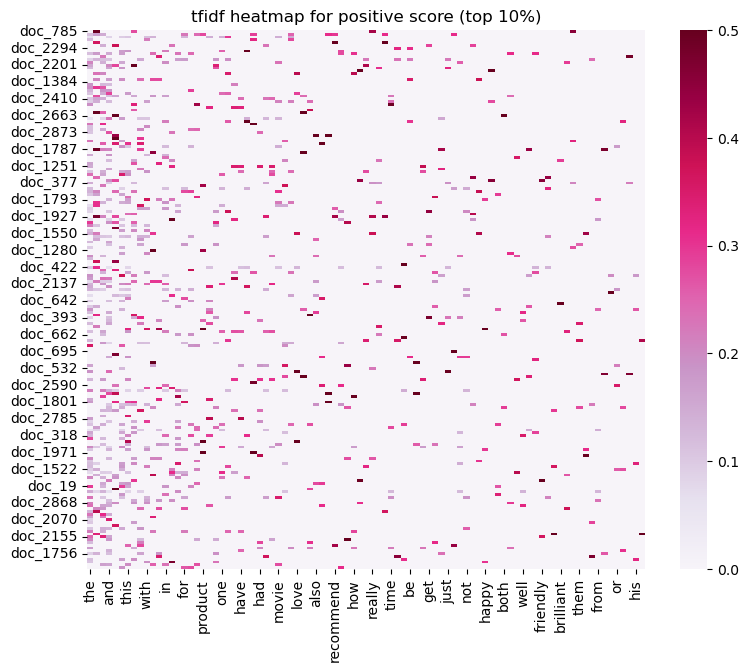

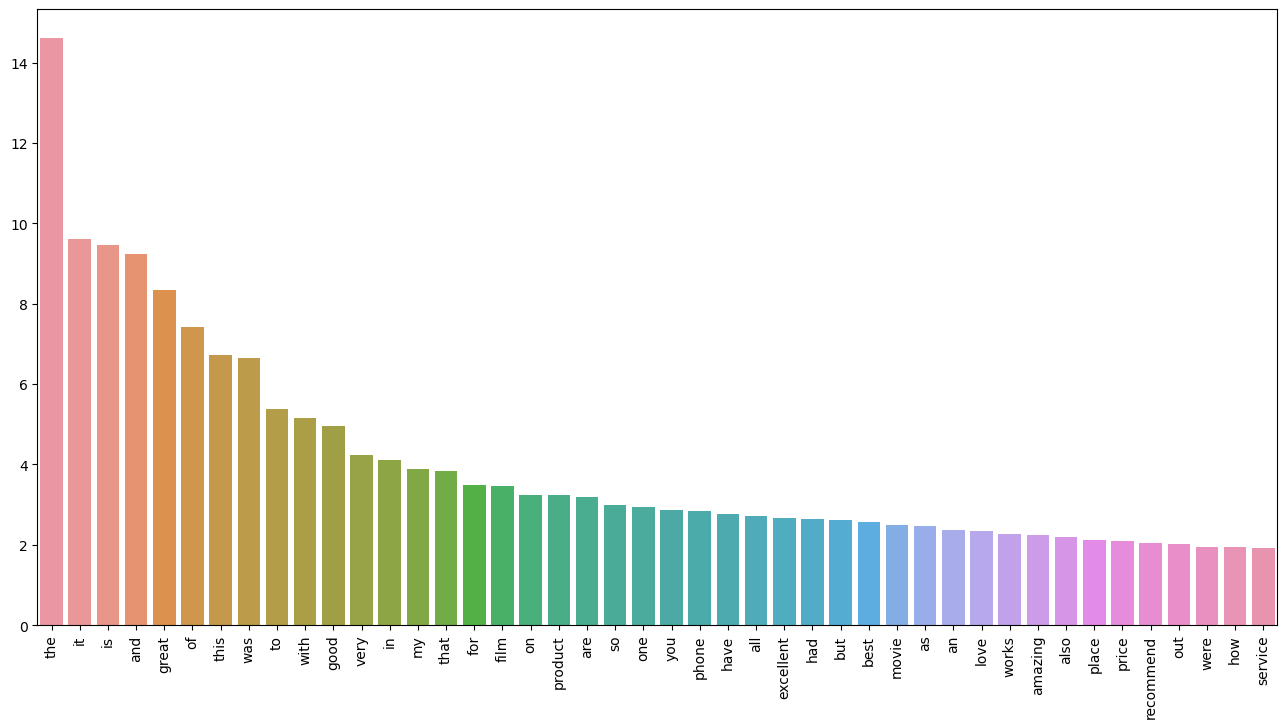

In [35]:
#calculate tfidf
tfidf_vec = vectorizer_tfidf.fit_transform(list(sample_data_positive.sentence))
print(tfidf_vec.shape)
print(tfidf_vec[0])

# sort word by frequency, only select the top 5% words
term_list_tfidf = [str(i) for i in vectorizer_tfidf.get_feature_names_out()]
sentence_list_tfidf = ["doc_"+ str(i) for i in list(sample_data_positive.index)]
tfidf_list = tfidf_vec.toarray() #X_counts[how many documents, how many terms]

#tfidf dataframe
tfidf_df_positive_sample = pd.DataFrame(tfidf_list, columns = term_list_tfidf, index = sentence_list_tfidf)
s_tfidf_data = tfidf_df_positive_sample.sum()
tfidf_df_rank = tfidf_df_positive_sample[s_tfidf_data.sort_values(ascending=False).index[:int(len(term_list_tfidf)*0.1)]]

# display and plot
display(tfidf_df_rank)
plt.subplots(figsize=(9, 7))
plt.title('tfidf heatmap for positive score (top 10%)')
ax = sns.heatmap(tfidf_df_rank,
                 cmap="PuRd",
                 vmin=0, vmax=0.5)

# filter the terms with frequency>=10
tfidf_bigger = tfidf_df_positive_sample[s_tfidf_data.sort_values(ascending=False).index[:int(len(term_list_tfidf)*0.05)]]
tfidf_bigger_arr = np.asarray(tfidf_bigger.sum(axis=0))
plt.subplots(figsize=(16, 8))
g = sns.barplot(x=list(tfidf_bigger.columns),  
            y=tfidf_bigger_arr)
g.set_xticklabels(list(tfidf_bigger.columns), rotation = 90);

(208, 930)
  (0, 231)	0.27395487471399915
  (0, 867)	0.22328000016528002
  (0, 877)	0.14303693740363493
  (0, 36)	0.1310935379298872
  (0, 147)	0.3269926542562134
  (0, 515)	0.23383334333317657
  (0, 329)	0.3269926542562134
  (0, 556)	0.2031189169838644
  (0, 648)	0.3269926542562134
  (0, 424)	0.13411421289212752
  (0, 884)	0.30352306292692516
  (0, 125)	0.2066280601137458
  (0, 370)	0.218646877362796
  (0, 542)	0.16650652873292324
  (0, 220)	0.27395487471399915
  (0, 558)	0.25447880703459513
  (0, 422)	0.16299738560304183
  (0, 814)	0.16131949611155835


the        it       was       and       not        is  \
doc_459   0.000000  0.134114  0.143037  0.131094  0.166507  0.162997   
doc_2221  0.196270  0.000000  0.272786  0.000000  0.000000  0.000000   
doc_43    0.000000  0.269602  0.000000  0.000000  0.334719  0.000000   
doc_2754  0.085492  0.000000  0.000000  0.108900  0.000000  0.270805   
doc_2700  0.112085  0.000000  0.000000  0.142774  0.181342  0.000000   
...            ...       ...       ...       ...       ...       ...   
doc_2033  0.000000  0.000000  0.000000  0.105882  0.000000  0.000000   
doc_1677  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
doc_2565  0.000000  0.000000  0.000000  0.109787  0.000000  0.000000   
doc_373   0.088654  0.231058  0.246430  0.000000  0.000000  0.000000   
doc_164   0.084531  0.110156  0.117485  0.000000  0.000000  0.000000   

              this        to      that        of  ...      were  your  worth  \
doc_459   0.161319  0.000000  0.000000  0.000000  ...  0.000000   0.0    0.0   
doc_2221  0.000000  0.000000  0.000000  0.000000  ...  0.000000   0.0    0.0   
doc_43    0.000000  0.000000  0.000000  0.000000  ...  0.000000   0.0    0.0   
doc_2754  0.000000  0.000000  0.139844  0.138318  ...  0.000000   0.0    0.0   
doc_2700  0.000000  0.000000  0.183344  0.000000  ...  0.286871   0.0    0.0   
...            ...       ...       ...       ...  ...       ...   ...    ...   
doc_2033  0.000000  0.135968  0.000000  0.134484  ...  0.000000   0.0    0.0   
doc_1677  0.000000  0.000000  0.000000  0.000000  ...  0.000000   0.0    0.0   
doc_2565  0.270200  0.281966  0.000000  0.000000  ...  0.000000   0.0    0.0   
doc_373   0.000000  0.145015  0.000000  0.000000  ...  0.000000   0.0    0.0   
doc_164   0.132502  0.138272  0.138272  0.000000  ...  0.000000   0.0    0.0   

          hours      didn  too  waste       one  has  product  
doc_459     0.0  0.000000  0.0    0.0  0.254479  0.0      0.0  
doc_2221    0.0  0.000000  0.0    0.0  0.000000  0.0      0.0  
doc_43      0.0  0.000000  0.0    0.0  0.000000  0.0      0.0  
doc_2754    0.0  0.211397  0.0    0.0  0.000000  0.0      0.0  
doc_2700    0.0  0.000000  0.0    0.0  0.000000  0.0      0.0  
...         ...       ...  ...    ...       ...  ...      ...  
doc_2033    0.0  0.000000  0.0    0.0  0.000000  0.0      0.0  
doc_1677    0.0  0.000000  0.0    0.0  0.000000  0.0      0.0  
doc_2565    0.0  0.000000  0.0    0.0  0.000000  0.0      0.0  
doc_373     0.0  0.000000  0.0    0.0  0.000000  0.0      0.0  
doc_164     0.0  0.000000  0.0    0.0  0.000000  0.0      0.0  

[208 rows x 93 columns]

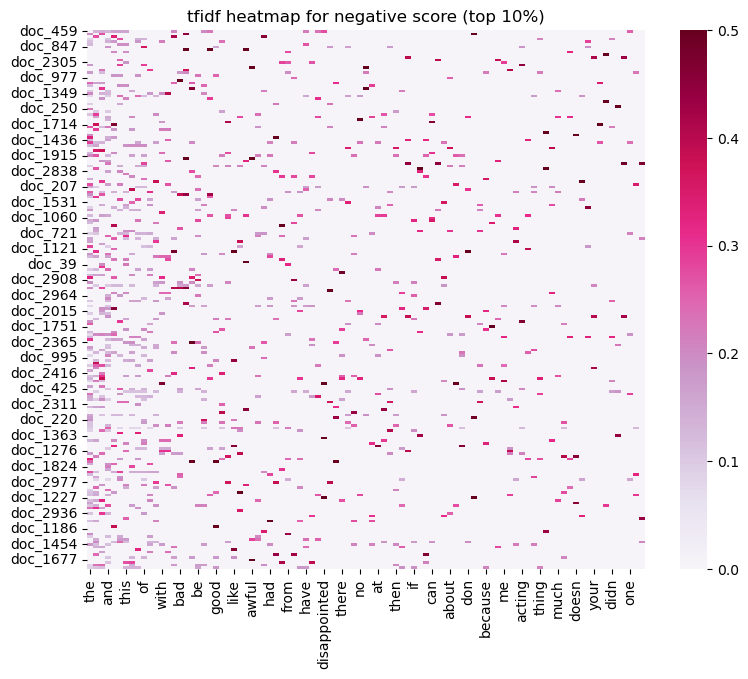

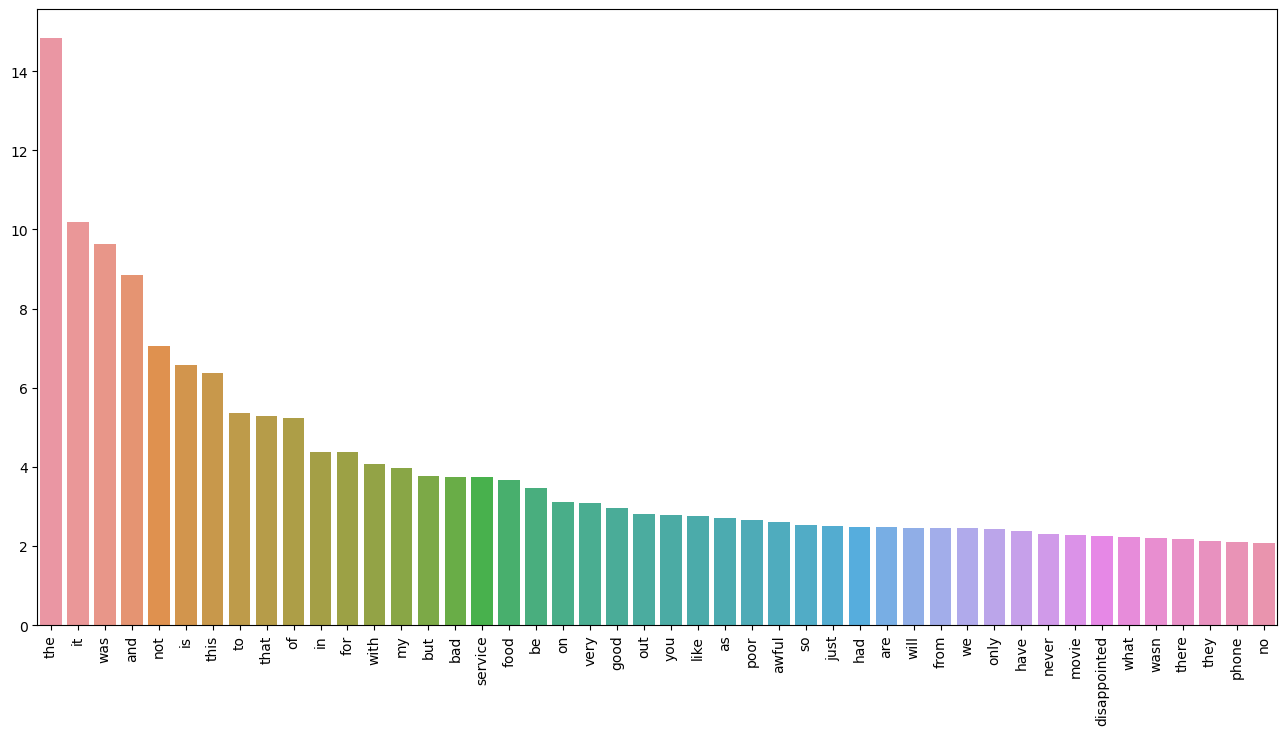

In [36]:
#calculate tfidf
tfidf_vec = vectorizer_tfidf.fit_transform(list(sample_data_negative.sentence))
print(tfidf_vec.shape)
print(tfidf_vec[0])

# sort word by frequency, only select the top 5% words
term_list_tfidf = [str(i) for i in vectorizer_tfidf.get_feature_names_out()]
sentence_list_tfidf = ["doc_"+ str(i) for i in list(sample_data_negative.index)]
tfidf_list = tfidf_vec.toarray() #X_counts[how many documents, how many terms]

#tfidf dataframe
tfidf_df_negative_sample = pd.DataFrame(tfidf_list, columns = term_list_tfidf, index = sentence_list_tfidf)
s_tfidf_data = tfidf_df_negative_sample.sum()
tfidf_df_rank = tfidf_df_negative_sample[s_tfidf_data.sort_values(ascending=False).index[:int(len(term_list_tfidf)*0.1)]]

# display and plot
display(tfidf_df_rank)
plt.subplots(figsize=(9, 7))
plt.title('tfidf heatmap for negative score (top 10%)')
ax = sns.heatmap(tfidf_df_rank,
                 cmap="PuRd",
                 vmin=0, vmax=0.5)

# filter the terms with frequency>=10
tfidf_bigger = tfidf_df_negative_sample[s_tfidf_data.sort_values(ascending=False).index[:int(len(term_list_tfidf)*0.05)]]
tfidf_bigger_arr = np.asarray(tfidf_bigger.sum(axis=0))
plt.subplots(figsize=(16, 8))
g = sns.barplot(x=list(tfidf_bigger.columns),  
            y=tfidf_bigger_arr)
g.set_xticklabels(list(tfidf_bigger.columns), rotation = 90);

#### Naive Bayes classifier
Use both the TF-IDF features and word frequency features to build two seperate classifiers.

In [37]:
data

sentence  score   website  \
0     A very, very, very slow-moving, aimless movie ...      0  imdb.com   
1     Not sure who was more lost - the flat characte...      0  imdb.com   
2     Attempting artiness with black & white and cle...      0  imdb.com   
3          Very little music or anything to speak of.        0  imdb.com   
4     The best scene in the movie was when Gerardo i...      1  imdb.com   
...                                                 ...    ...       ...   
2995  I think food should have flavor and texture an...      0  yelp.com   
2996                           Appetite instantly gone.      0  yelp.com   
2997  Overall I was not impressed and would not go b...      0  yelp.com   
2998  The whole experience was underwhelming, and I ...      0  yelp.com   
2999  Then, as if I hadn't wasted enough of my life ...      0  yelp.com   

                                               unigrams  \
0     [A, very, ,, very, ,, very, slow-moving, ,, ai...   
1     [Not, sure, who, was, more, lost, -, the, flat...   
2     [Attempting, artiness, with, black, &, white, ...   
3     [Very, little, music, or, anything, to, speak,...   
4     [The, best, scene, in, the, movie, was, when, ...   
...                                                 ...   
2995  [I, think, food, should, have, flavor, and, te...   
2996                     [Appetite, instantly, gone, .]   
2997  [Overall, I, was, not, impressed, and, would, ...   
2998  [The, whole, experience, was, underwhelming, ,...   
2999  [Then, ,, as, if, I, had, n't, wasted, enough,...   

                    website_cnt bin_website  
0     score    997
dtype: int64   [0, 1, 0]  
1     score    997
dtype: int64   [0, 1, 0]  
2     score    997
dtype: int64   [0, 1, 0]  
3     score    997
dtype: int64   [0, 1, 0]  
4     score    997
dtype: int64   [0, 1, 0]  
...                         ...         ...  
2995  score    996
dtype: int64   [0, 0, 1]  
2996  score    996
dtype: int64   [0, 0, 1]  
2997  score    996
dtype: int64   [0, 0, 1]  
2998  score    996
dtype: int64   [0, 0, 1]  
2999  score    996
dtype: int64   [0, 0, 1]  

[2983 rows x 6 columns]

In [38]:
# generating word frequency features daatset : data_counts
count_vect_data = CountVectorizer()
data_counts = count_vect_data.fit_transform(data.sentence) #learn the vocabulary and return document-term matrix

# sort word by frequency, only select the top 5% words
term_list = [str(i) for i in count_vect_data.get_feature_names_out()]
sentence_list = ["doc_"+ str(i) for i in list(data.index)]
tf_list = data_counts.toarray() #X_counts[how many documents, how many terms]

#tfidf dataframe
tf_df = pd.DataFrame(tf_list, columns = term_list, index = sentence_list)

In [39]:
# generating TF-IDF features dataset : tfidf_vec
vectorizer_tfidf = TfidfVectorizer()
tfidf_vec = vectorizer_tfidf.fit_transform(data.sentence)

# sort word by frequency, only select the top 5% words
term_list = [str(i) for i in vectorizer_tfidf.get_feature_names_out()]
sentence_list = ["doc_"+ str(i) for i in list(data.index)]
tfidf_list = tfidf_vec.toarray() #X_counts[how many documents, how many terms]

#tfidf dataframe
tfidf_df = pd.DataFrame(tfidf_list, columns = term_list, index = sentence_list)

In [40]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

In [41]:
# classifiers of frequency features
tf_x_train, tf_x_test, tf_y_train, tf_y_test = train_test_split(tf_df.iloc[:,:-1], data['score'], test_size=0.2)
bnb_tf = BernoulliNB(binarize=0.0)
bnb_tf.fit(tf_x_train, tf_y_train)
print('classifiers of TF features score : ')
bnb_tf.score(tf_x_test, tf_y_test)

classifiers of TF features score : 


0.8056951423785594

In [42]:
# classifiers of TF-IDF features
tfidf_x_train, tfidf_x_test, tfidf_y_train, tfidf_y_test = train_test_split(tfidf_df.iloc[:,:-1], data['score'], test_size=0.2)
bnb_tfidf = BernoulliNB(binarize=0.0)
bnb_tfidf.fit(tfidf_x_train, tfidf_y_train)
print('classifiers of TF-IDF features score : ')
bnb_tfidf.score(tfidf_x_test, tfidf_y_test)

classifiers of TF-IDF features score : 


0.8341708542713567

__我認為 TF 的分類結果比 TFIDF 分類的結果較佳是因為 : TFIDF 相較於 TF 多考慮了文字的普遍性(文字越常見，則重要度越小)。在這個正面/負面分類任務中，特定文字在各個句子中出現的頻率(TF)，相較於特定文字在更廣泛的上下文中的重要性(TFIDF)，可以幫助分類器更好的判斷句子在正面或負面的分類，加入了 IDF 可能會降低某些常見且具有很強分類效果 Feature 的資訊。__

#### new data visualizations

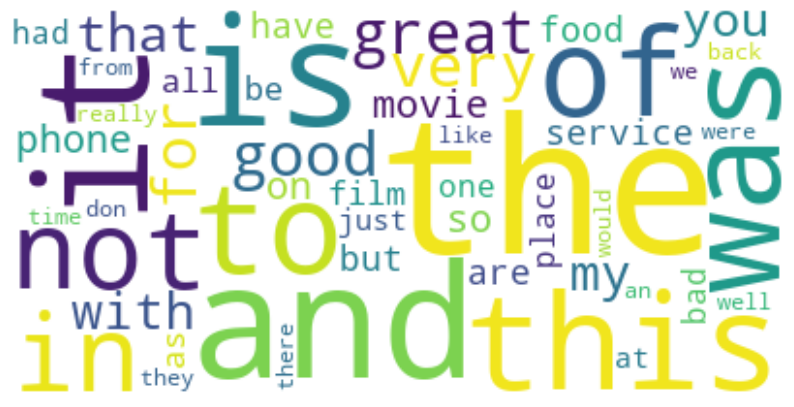

In [43]:
from wordcloud import WordCloud

# wordcloud by TF-IDF
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(tfidf_df.T.sum(axis=1))
plt.figure(figsize=(10,6), dpi=100)
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

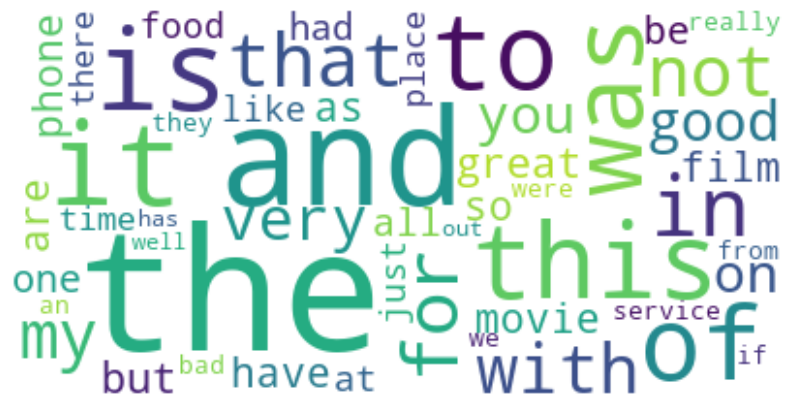

In [44]:
# wordcloud by TF
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(tf_df.T.sum(axis=1))
plt.figure(figsize=(10,6), dpi=100)
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

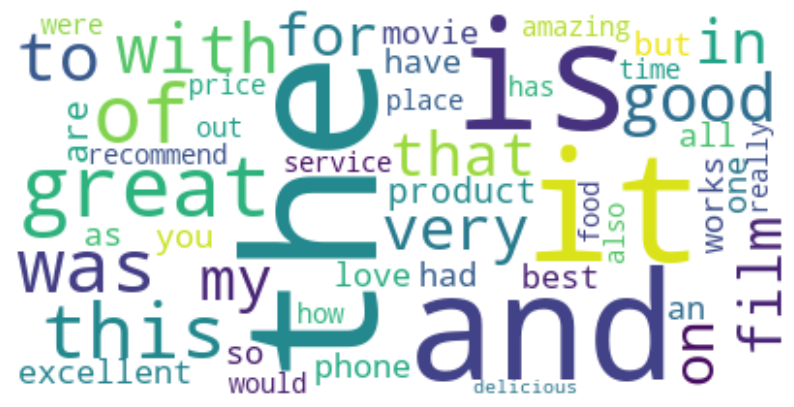

In [45]:
# wordcloud by TF-IDF of positive samples
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(tfidf_df_positive_sample.T.sum(axis=1))
plt.figure(figsize=(10,6), dpi=100)
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

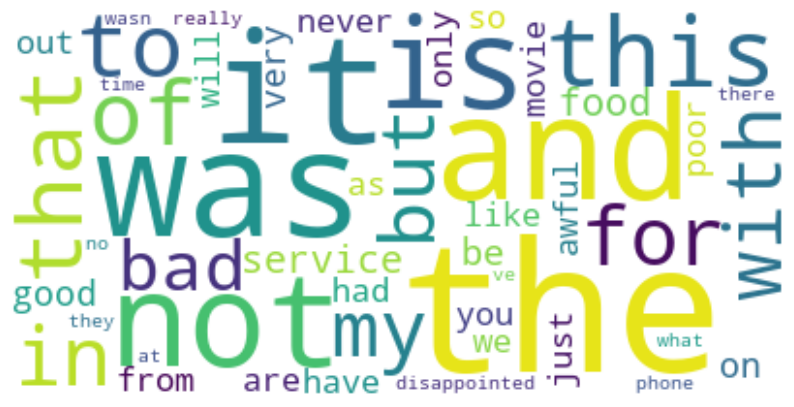

In [46]:
# wordcloud by TF-IDF of negative samples
Cloud = WordCloud(background_color="white", max_words=50).generate_from_frequencies(tfidf_df_negative_sample.T.sum(axis=1))
plt.figure(figsize=(10,6), dpi=100)
plt.imshow(Cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Fourth
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? 

__根據 term frequency 跟 TFIDF 的分析結果，可以發現 stop words 佔了文字分析的比重很大，所以我認為應該要有一個資料處理的部分去 define 適用於該資料集的 stop words 或是減少資料集的影響，第二個資料集中分析 "評論" 的內容，具有句子很短而且大多都是 stop words 的特性，因此若刪除資料集的ˊ stop words 的詞彙量就會變得很少，根據課堂所學，我覺得可利用 N-gram features 的方式改善 (因為目前所用的 nlp converter 套件大多都是 unigram，且英文中包含許多片語)，在文字分析上應會相較於 unigram更有效率且分類結果更佳__

__此外我認為 PCA 等降維方法可解釋性低，我認為可以用其他的方法降低 features 的數量，例如篩掉 frequency 小於特定數量的詞__